<a href="https://colab.research.google.com/github/satishchaudhary382/algorithmic-trading-with-python/blob/master/MEROLAGANI%20FAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install selenium
# !apt-get update 
# !apt install chromium-chromedriver
# !pip install pandas_ta
# !pip install MarketProfile
# !pip install fake-useragent
# !pip install mpl_finance

In [1]:
import time
import datetime
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
from fake_useragent import UserAgent
import requests

from selenium import webdriver
from market_profile import MarketProfile
import random
import pandas_ta as ta
useragent = UserAgent()
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
import bokeh
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import altair as alt
from math import pi
from bokeh.io import output_notebook
from bokeh.models import Label
from datetime import datetime as dt
# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()
%matplotlib inline
from math import pi
from bokeh.models import Span
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import pandas_datareader as pdr

from bs4 import BeautifulSoup

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import Select


In [62]:
import bs4 as bs
import urllib.request
import pandas as pd

source = urllib.request.urlopen('https://nepalstockinfo.com/companyhistory/SINDU').read()
soup = bs.BeautifulSoup(source,'lxml')

# table = soup.find('table', attrs={'class':'subs noBorders evenRows'})
# table_rows = table.find_all('tr')

In [63]:
table = soup.find('table', attrs={'class':'table table-bordered stripe row-border order-column example_datatable_fixedcolumn'})
table_rows = table.find_all('tr')
for tr in table_rows:
  td = tr.find_all('td')
  row = [tr.text for tr in td]
  print(row)

[]
['1', '2021-05-19', '280', '-13', '300', '278', '293', '332', '65740', '18695800']
['2', '2021-05-18', '293', '15', '303', '273', '278', '457', '102393', '29211400']
['3', '2021-05-17', '278', '1', '285', '273', '277', '429', '87945', '24433900']
['4', '2021-05-16', '277', '20', '282', '265', '257', '1139', '308503', '84625200']
['5', '2021-05-13', '257', '13', '257', '247', '244', '249', '58039', '14778600']
['6', '2021-05-12', '244', '2', '248', '233', '242', '128', '34803', '8423850']
['7', '2021-05-11', '242', '2', '244', '236', '240', '74', '13393', '3233580']
['8', '2021-05-10', '240', '1', '244', '238', '239', '57', '9620', '2315980']
['9', '2021-05-09', '239', '-4', '244', '237', '243', '77', '10246', '2457550']
['10', '2021-05-06', '243', '-3', '249', '242', '246', '73', '11158', '2732860']
['11', '2021-05-05', '246', '-3', '249', '243', '249', '91', '16989', '4168720']
['12', '2021-05-04', '249', '-1', '249', '245', '250', '122', '28844', '7095140']
['13', '2021-05-03', '2

In [2]:
from bs4 import BeautifulSoup
data = []

In [3]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument(f"user-agent = {useragent.random}")
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

delay = 10

url = "https://merolagani.com/CompanyDetail.aspx?symbol=NABIL"
wait = WebDriverWait(driver, 10)
driver.get(url)

price = wait.until(EC.element_to_be_clickable((By.XPATH,"//a[@title='Price History']")))
price.click()
time.sleep(5)


# table = soup.find('table', attrs={'class':'table table-bordered table-striped table-hover'})
# table_rows = table.find_all('tr')
# for tr in table_rows:
#   td = tr.find_all('td')
#   row = [tr.text for tr in td]
#   print(row)
a=1
while a<3:
  tables = driver.find_element_by_xpath("//table[@class='table table-bordered table-striped table-hover']")
  driver.execute_script("window.open(arguments[0], '_blank');", tables)
  soup = BeautifulSoup(driver.page_source,'lxml')
  table = soup.find('table', attrs={'class':'table table-bordered table-striped table-hover'})
  table_rows = table.find_all('tr')
  for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    data.append(row)
  driver.find_element_by_xpath('//*[@title="Next Page"]').click()
  time.sleep(5)
  a+=1
driver.quit()

In [4]:
data

[[],
 ['1',
  '2021/05/19',
  '1,302.00',
  '-0.46',
  '1,373.00',
  '1,290.00',
  '1,373.00',
  '103,756',
  '135,522,514.00'],
 ['2',
  '2021/05/18',
  '1,308.00',
  '0',
  '1,373.00',
  '1,304.00',
  '1,373.00',
  '73,064',
  '95,638,111.00'],
 ['3',
  '2021/05/17',
  '1,308.00',
  '1.55',
  '1,320.00',
  '1,299.00',
  '1,299.00',
  '103,727',
  '135,830,004.00'],
 ['4',
  '2021/05/16',
  '1,288.00',
  '1.66',
  '1,300.00',
  '1,265.00',
  '1,265.00',
  '165,718',
  '212,568,856.00'],
 ['5',
  '2021/05/13',
  '1,267.00',
  '0.4',
  '1,270.00',
  '1,260.00',
  '1,270.00',
  '76,245',
  '96,345,911.00'],
 ['6',
  '2021/05/12',
  '1,262.00',
  '-0.24',
  '1,275.00',
  '1,259.00',
  '1,265.00',
  '94,423',
  '119,497,170.00'],
 ['7',
  '2021/05/11',
  '1,265.00',
  '0.4',
  '1,274.00',
  '1,256.00',
  '1,256.00',
  '95,404',
  '120,585,084.00'],
 ['8',
  '2021/05/10',
  '1,260.00',
  '0.08',
  '1,273.00',
  '1,255.00',
  '1,264.00',
  '67,445',
  '85,094,464.00'],
 ['9',
  '2021/05/09',

In [53]:
# class="table table-bordered table-striped table-hover"
table = soup.find('table', attrs={'class':'table table-bordered table-striped table-hover'})
table_rows = table.find_all('tr')
for tr in table_rows:
  td = tr.find_all('td')
  row = [tr.text for tr in td]
  print(row)

[]
['1', '2021/05/19', '254.00', '4.96', '266.00', '241.00', '254.00', '170,727', '43,816,526.00']
['2', '2021/05/18', '242.00', '10', '242.00', '220.00', '221.00', '230,854', '54,398,414.00']
['3', '2021/05/17', '220.00', '0', '226.00', '213.00', '220.00', '139,682', '30,461,334.00']
['4', '2021/05/16', '220.00', '6.8', '226.00', '212.00', '216.00', '176,042', '38,868,026.00']
['5', '2021/05/13', '206.00', '9.57', '206.00', '186.00', '188.00', '249,083', '50,230,252.00']
['6', '2021/05/12', '188.00', '5.03', '191.00', '178.00', '178.00', '89,558', '16,641,650.00']
['7', '2021/05/11', '179.00', '-0.56', '182.00', '179.00', '180.00', '33,709', '6,073,778.00']
['8', '2021/05/10', '180.00', '0.56', '182.00', '174.00', '182.00', '19,292', '3,437,507.00']
['9', '2021/05/09', '179.00', '-0.56', '189.00', '176.00', '189.00', '23,202', '4,148,987.00']
['10', '2021/05/06', '181.00', '2.26', '185.00', '173.00', '185.00', '56,798', '10,221,293.00']
['11', '2021/05/05', '177.00', '0', '185.00', '1

<html xmlns="http://www.w3.org/1999/xhtml"><head><script src="https://m.addthis.com/live/red_lojson/300lo.json?si=60a56b2ac7af2584&amp;bkl=0&amp;bl=1&amp;pdt=928&amp;sid=60a56b2ac7af2584&amp;pub=ra-545b25ce40103429&amp;rev=v8.28.8-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=merolagani.com&amp;fp=CompanyDetail.aspx%3Fsymbol%3DBFC&amp;fr=&amp;of=0&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1621453610177&amp;jsl=1&amp;uvs=60a56b2a6820ccf4000&amp;skipb=1&amp;callback=addthis.cbs.jsonp__62091479283415610" type="text/javascript"></script><script src="https://v1.addthisedge.com/live/boost/ra-545b25ce40103429/_ate.track.config_resp" type="text/javascript"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script src="https://z.moatads.com/addthismoatframe568911941483/moatframe.js" type="text/javascript"></script><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-
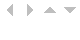

In [51]:
soup